# ВКР Соболева А.Е. Часть третья. Нейронные сети (3 варианта) в Google Colab

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
print(tf.__version__)

2.12.0


In [2]:

from keras import layers
from keras import Sequential
from keras import utils
from keras import layers
from keras import Sequential
#from keras.models import Sequential

from keras.layers import Dense, Activation
from keras.layers import BatchNormalization, LeakyReLU, Dropout, LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
#from tensorflow import Sequential

#from tensorflow.keras import Sequential
#from tensorflow.keras import layers
#from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Activation,  LSTM

#from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import LinearRegression, SGDRegressor

from keras.callbacks import EarlyStopping, ModelCheckpoint
print(tf.__version__)

2.12.0


In [ ]:
#from tensorflow.keras.optimizers import RMSprop
#from keras.losses import SparseCategoricalCrossentropy
#from keras.optimizers import Adam

In [ ]:
#import sklearn
#from sklearn.model_selection import  train_test_split
#from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Dense, Dropout
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
#import numpy as np
#import pandas as pd
#import scipy
#from sklearn.model_selection import StratifiedKFold

#### В первой части мы проанализировали, объединили части и очистили от выбросов датасет, результат сохранили в result_clean.xlsx.  


#### Помним, что при первичной обработке данных мы заменили название "Соотношение матрица-наполнитель" на "Пропорции, %" в файле result_clean.xlsx". Теперь повторно импортируем его

##### Так как требуется предсказать соотношение "матрица\наполнитель", делим данные на Train/Test по столбцу "Пропорции" с учётом параметра random_state = 64, тренировочные и тестовые части X_train1, X_test1, Y_train1, Y_test1 должны получаться аналогичными ранее рассмотренным.

In [48]:
result_clean = pd.read_excel(r"/content/result_clean.xlsx")

In [5]:
m = result_clean.describe()
m.loc[['mean', ]]

,"Пропорции, %","Плотность, кг/м3","модуль упругости, ГПа","Отвердитель, %","Эпокс. группы, %","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
mean,2.925683,1974.040023,738.247627,110.916216,22.20903,286.040414,482.993901,73.305127,2467.488822,217.613374,0.511752,6.915585,57.451895


In [ ]:
#result_clean.drop(['Unnamed: 0'], axis=1, inplace=True)

#### Создадим нормализацию для отдельной нормализации X и y

In [49]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [ ]:
#result_norm = pd.DataFrame(scaler.fit_transform(result_clean), index=result_clean.index, columns=result_clean.columns)

In [ ]:
# result_norm = pd.DataFrame(result_clean, index=result_clean.index, columns=result_clean.columns)

In [50]:
y2 = result_norm["Пропорции, %"]
x2 = result_norm.drop(columns = ["Пропорции, %"])
#X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x2, y2, test_size = 0.3, random_state = 64)

In [51]:
x2 = pd.DataFrame(x2)
x3 = pd.DataFrame(scaler_x.fit_transform(x2), index=x2.index, columns=x2.columns)

In [52]:
y2 = pd.DataFrame(y2)
y3 = pd.DataFrame(scaler_y.fit_transform(y2), index=y2.index, columns=y2.columns)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(x3, y3, test_size = 0.3, random_state = 64)

In [54]:
X_train2.head(5)

,"Плотность, кг/м3","модуль упругости, ГПа","Отвердитель, %","Эпокс. группы, %","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
895,0.881287,0.515075,0.490364,0.713817,0.845739,0.562840,0.686598,0.484995,0.465171,1.0,0.208260,0.663716
791,0.898950,0.811452,0.237440,0.474119,0.215832,0.214211,0.466791,0.426707,0.350344,1.0,0.507186,0.470402
900,0.614478,0.478470,0.425326,0.341536,0.344289,0.770562,0.405327,0.396399,0.429676,1.0,0.610875,0.557247
588,0.823799,0.247817,0.612198,0.505153,0.549126,0.393503,0.639999,0.331083,0.417775,1.0,0.577441,0.587773
204,0.587796,0.575710,0.810285,0.639928,0.560066,0.549697,0.230828,0.035579,0.266877,0.0,0.481028,0.273777


In [ ]:
Y_train2.head(5)

895    0.255460
791    0.457162
900    0.780140
588    0.742808
204    0.499377
Name: Пропорции, %, dtype: float64

#### Разделение получилось, данные нормализованы и в трансп. виде размер треннировочной части 655 х 12.
#### Вспомним  размерность  X_train2

In [57]:
print(X_train2.shape[1], ', ',  X_train2.shape[0])

12 ,  655


## Создадим нейронную сеть model 1

In [58]:
model1 = Sequential()
model1.add(Dense (128, input_dim = X_train2.shape[1], activation = 'relu'))
model1.add(BatchNormalization())
model1.add (Dropout(0.2))
model1.add(Dense(64, activation = 'LeakyReLU'))
model1.add(BatchNormalization())
model1.add (Dropout(0.2))
model1.add(Dense(32, activation = 'LeakyReLU'))
model1.add(Dense(1, activation='elu'))

In [59]:
model1.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False), loss='mean_absolute_error')

In [60]:
%%time
hist_model1 = model1.fit(X_train2, Y_train2, batch_size = 64, epochs=40, verbose=1, validation_split = 0.2)

Epoch 1/40
9/9 [==============================] - 1s 33ms/step - loss: 0.6638 - val_loss: 0.4554
Epoch 2/40
9/9 [==============================] - 0s 9ms/step - loss: 0.4194 - val_loss: 0.3824
Epoch 3/40
9/9 [==============================] - 0s 9ms/step - loss: 0.2638 - val_loss: 0.3915
Epoch 4/40
9/9 [==============================] - 0s 8ms/step - loss: 0.2094 - val_loss: 0.2931
Epoch 5/40
9/9 [==============================] - 0s 7ms/step - loss: 0.1948 - val_loss: 0.2497
Epoch 6/40
9/9 [==============================] - 0s 7ms/step - loss: 0.1718 - val_loss: 0.2048
Epoch 7/40
9/9 [==============================] - 0s 10ms/step - loss: 0.1710 - val_loss: 0.1864
Epoch 8/40
9/9 [==============================] - 0s 8ms/step - loss: 0.1627 - val_loss: 0.1745
Epoch 9/40
9/9 [==============================] - 0s 7ms/step - loss: 0.1645 - val_loss: 0.1614
Epoch 10/40
9/9 [==============================] - 0s 10ms/step - loss: 0.1606 - val_loss: 0.1481
Epoch 11/40
9/9 [===================

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [61]:
#Функция графика ошибок модели на тренировочной и тестовой выборках
def model1_loss_plt(hist_model1):
    plt.figure(figsize=(10, 5))
    plt.plot(hist_model1.history['loss'])
    plt.plot(hist_model1.history['val_loss'])
    plt.title('График потерь модели model1', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()


#Функция графика модели для тестового и предсказанного значения у
def model1_act_and_pred_plt(orig_Y, pred_Y): 
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения model1', size=12)
    plt.plot(orig_Y, color='blue', label = 'Тестовые значения')
    plt.plot(pred_Y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()


#Функция для построения точечного графика тестового и предсказанного значения у 
def model1_act_and_pred_scatter(orig_Y, pred_Y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений model1', size=15)
    plt.scatter(orig_Y, pred_Y, c = 'b')
    #plt.scatter(pred_Y, c = 'r')
    #plt.scatter(orig_Y, c = 'g')
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()


 ### Рисуем график потерь модели на тренировочной и тестовой выборках 

In [62]:
predict = model1.predict(np.array((X_test2)))
original = Y_test2.values


9/9 [==============================] - 0s 4ms/step


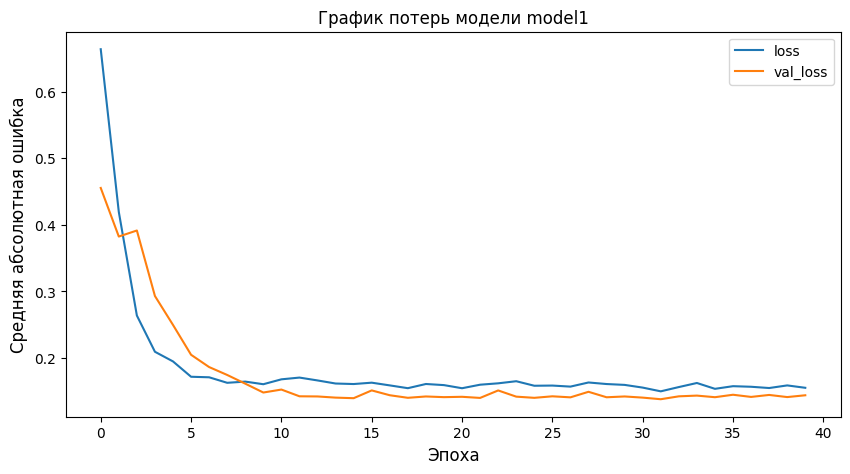

In [63]:
model1_loss_plt(hist_model1)

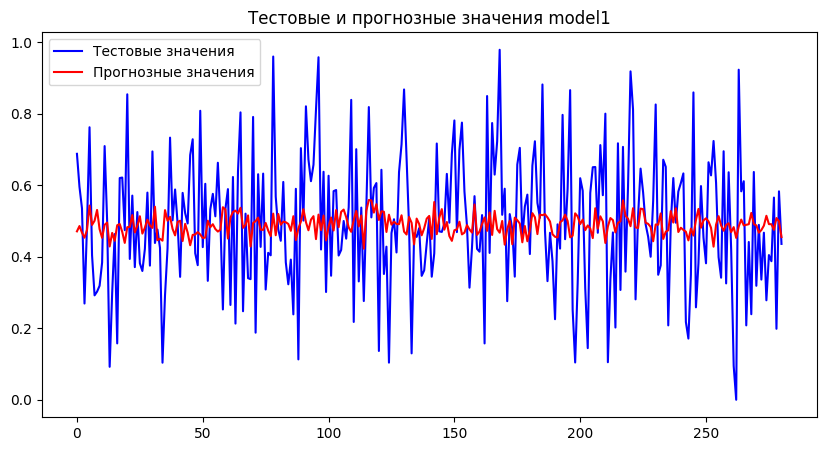

In [ ]:
model1_act_and_pred_plt(original, predict)

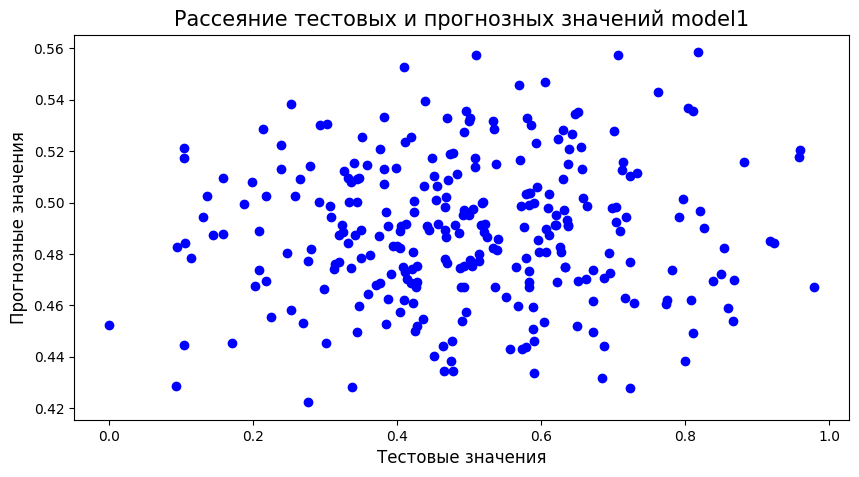

In [ ]:
model1_act_and_pred_scatter(original, predict)

# Создадим второй вариант нейронной сети 

In [64]:
model2 = Sequential()
model2.add(Dense (128, input_dim = X_train2.shape[1], activation = 'relu'))
model2.add(BatchNormalization())
model2.add (Dropout(0.8))
model2.add(Dense (128, activation = 'tanh'))
model2.add(BatchNormalization())
model2.add (Dropout(0.4))
model2.add(Dense(64, activation = 'tanh'))
model2.add(BatchNormalization())
model2.add (Dropout(0.2))
model2.add(Dense(32, activation = 'tanh'))
model2.add(Dense(16, activation = 'tanh'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1))

In [65]:
model2.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False), loss='mean_absolute_error')

In [66]:
%%time
hist_model2 = model2.fit(X_train2, Y_train2, batch_size = 64, epochs=40, verbose=0, validation_split = 0.2)

CPU times: user 4.9 s, sys: 179 ms, total: 5.08 s
Wall time: 6.74 s


In [67]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_11 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_12 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 128)              

In [68]:
#Функция графика ошибок модели на тренировочной и тестовой выборках
def model2_loss_plt(hist_model2):
    plt.figure(figsize=(10, 5))
    plt.plot(hist_model2.history['loss'])
    plt.plot(hist_model2.history['val_loss'])
    plt.title('График потерь модели model2', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()


#Функция графика модели для тестового и предсказанного значения у
def model2_act_and_pred_plt(orig_Y, pred_Y): 
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения model2', size=12)
    plt.plot(orig_Y, color='blue', label = 'Тестовые значения')
    plt.plot(pred_Y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()


#Функция для построения точечного графика тестового и предсказанного значения у 
def model2_act_and_pred_scatter(orig_Y, pred_Y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений model2', size=15)
    plt.scatter(orig_Y, pred_Y, c = 'r')
    #plt.scatter(pred_Y, c = 'r')
    #plt.scatter(orig_Y, c = 'g')
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

In [69]:
predict2 = model2.predict(np.array((X_test2)))
original2 = Y_test2.values


9/9 [==============================] - 0s 2ms/step


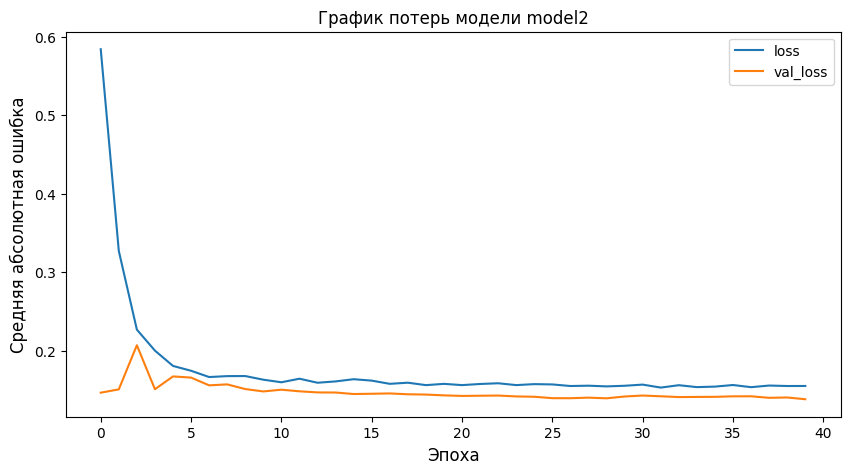

In [70]:
model2_loss_plt(hist_model2)

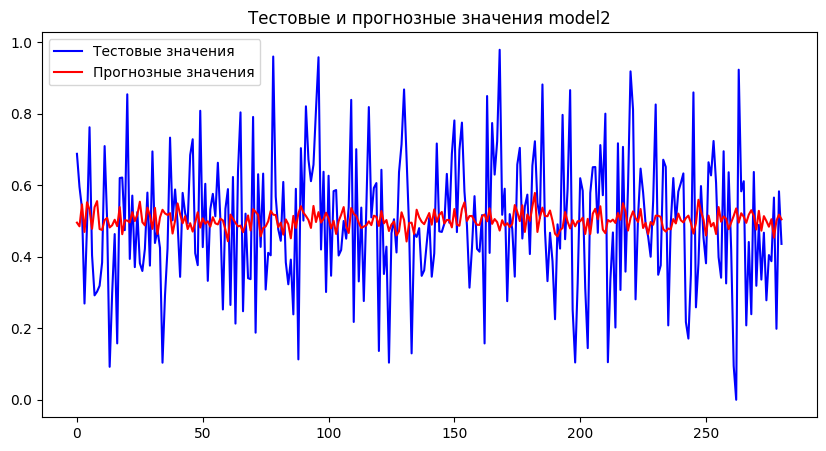

In [71]:
model2_act_and_pred_plt(original2, predict2)

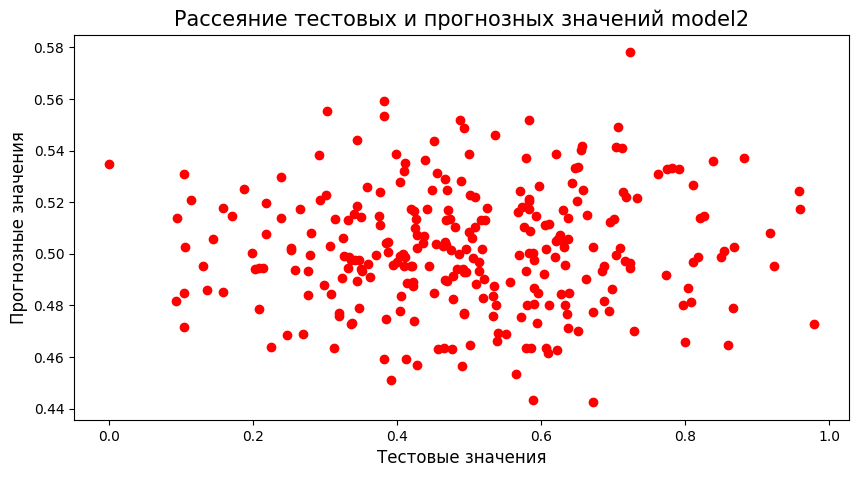

In [72]:
model2_act_and_pred_scatter(original2, predict2)

# Создадим третью модель простой архитектуры

In [73]:
model3 = Sequential()
model3.add(Dense (12, input_dim = X_train2.shape[1], activation = 'relu'))
model3.add(BatchNormalization())
model3.add (Dropout(0.8))
model3.add(Dense(6, activation = 'softmax'))
model3.add(Dense(1))

In [74]:
model3.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False), loss='mean_absolute_error')

In [75]:
%%time
hist_model3 = model3.fit(X_train2, Y_train2, batch_size = 64, epochs=40, verbose=0, validation_split = 0.2)

CPU times: user 3.71 s, sys: 94.5 ms, total: 3.8 s
Wall time: 6.16 s


In [37]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_8 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 12)                0         
                                                                 
 dense_19 (Dense)            (None, 6)                 78        
                                                                 
 dense_20 (Dense)            (None, 1)                 7         
                                                                 
Total params: 289
Trainable params: 265
Non-trainable params: 24
_______________________________________________________

In [76]:
#Функция графика ошибок модели на тренировочной и тестовой выборках
def model3_loss_plt(hist_model3):
    plt.figure(figsize=(10, 5))
    plt.plot(hist_model3.history['loss'])
    plt.plot(hist_model3.history['val_loss'])
    plt.title('График потерь модели model3', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()


#Функция графика модели для тестового и предсказанного значения у
def model3_act_and_pred_plt(orig_Y, pred_Y): 
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения model3', size=12)
    plt.plot(orig_Y, color='blue', label = 'Тестовые значения')
    plt.plot(pred_Y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()


#Функция для построения точечного графика тестового и предсказанного значения у 
def model3_act_and_pred_scatter(orig_Y, pred_Y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений model3', size=15)
    plt.scatter(orig_Y, pred_Y, c = 'g')
    #plt.scatter(pred_Y, c = 'r')
    #plt.scatter(orig_Y, c = 'g')
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

In [77]:
predict3 = model3.predict(np.array((X_test2)))
original3 = Y_test2.values

9/9 [==============================] - 0s 2ms/step


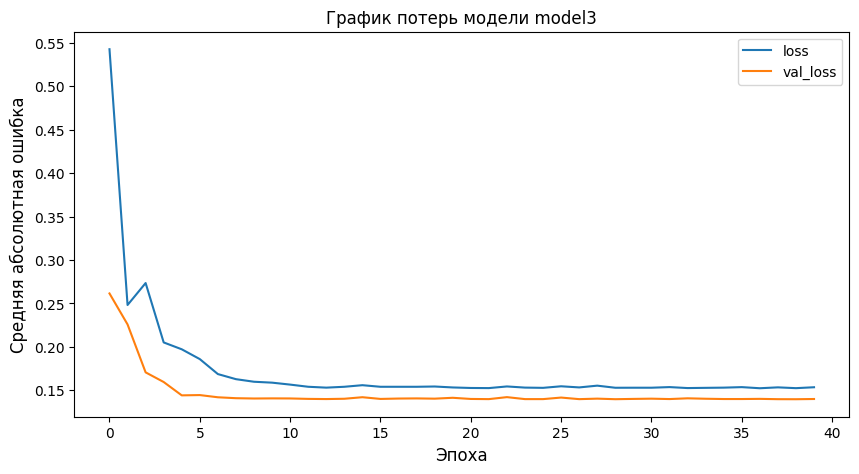

In [40]:
model3_loss_plt(hist_model3)

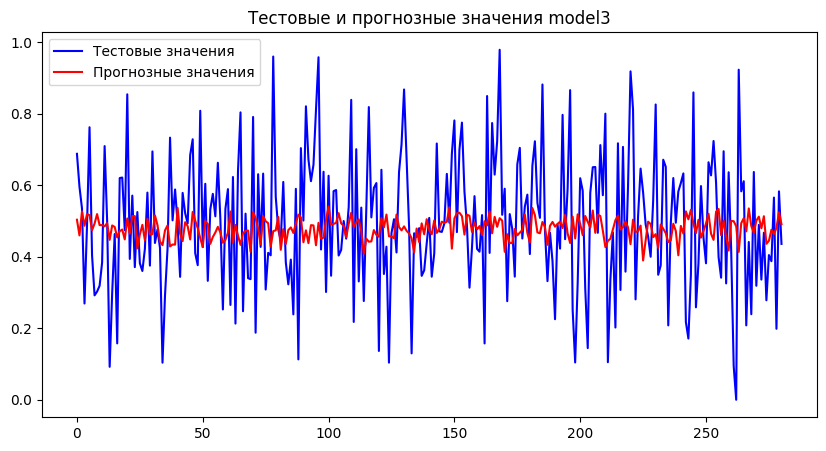

In [78]:
model3_act_and_pred_plt(original, predict)

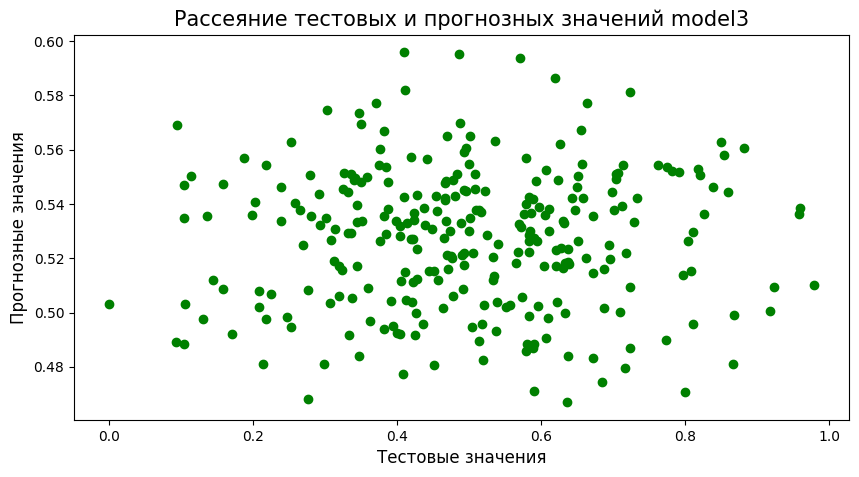

In [43]:
model3_act_and_pred_scatter(original, predict)

In [44]:
import pickle

#### Сохраняем предобученные модели всех трёх вариантов нейронных сетей и их нормализаторы X и Y для использования в дальнейшей работе по созданию приложения. 

In [79]:
pickle.dump(model1, open('neuron_model1.pkl', 'wb'))

In [80]:
pickle.dump(model2, open('neuron_model2.pkl', 'wb'))

In [81]:
pickle.dump(model3, open('neuron_model3.pkl', 'wb'))

In [82]:
pickle.dump(scaler_x, open('model_scaler_x.pkl', 'wb'))
pickle.dump(scaler_y, open('model_scaler_y.pkl', 'wb'))
print('scaler_x, scaler_y.pkl, is create and saved')

scaler_x, scaler_y.pkl, is create and saved
